# Moore-Penrose pseudo inverse

In [ ]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

Write a function computing the Moore-Penrose pseudo inverse, exploiting the full SVD.

In [ ]:
def my_pinv1(A):
  U,s,VT = np.linalg.svd(A, full_matrices=True)
  s[s>0] = 1 / s[s>0] 
  #for i in range(len(s)):
  #  s[i]= (1/s[i]) if s[i]>0 else 0
  return VT.transpose() @ la.diagsvd(s, A.shape[1], A.shape[0]) @ U.transpose()

Write now a function computing the Moore-Penrose pseudo inverse, exploiting the reduced SVD.

In [ ]:
def my_pinv2(A):
  U,s,VT = np.linalg.svd(A, full_matrices=False)
  s[s>0] = 1 / s[s>0] 
  #for i in range(len(s)):
  #  s[i]= (1/s[i]) if s[i]>0 else 0
  return VT.transpose() @ np.diag(s) @ U.transpose()

Generate a random matrix $A$ (with elements sampled from a standard Gaussian distribution) with 5 rows and 4 columns. Compute its Moore-Penrose pseudo inverse thorugh the two functions above defined, and compare the result with the function `numpy.linalg.pinv` (see [Documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html)).

In [ ]:
A = np.random.randn(5,4)
pinvA_0 = np.linalg.pinv(A)
pinvA_1 = my_pinv1(A)
pinvA_2 = my_pinv2(A)

np.linalg.norm(pinvA_0 - pinvA_1), np.linalg.norm(pinvA_0 - pinvA_2)

(1.4663288263469633e-16, 1.4663288263469633e-16)

Compare the three implementations performances through the Google Colab magic command `%timeit`.

In [ ]:
%timeit np.linalg.pinv(A)

The slowest run took 6.77 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 53.9 µs per loop


In [ ]:
%timeit my_pinv1(A)

The slowest run took 5.80 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 75.1 µs per loop


In [ ]:
%timeit my_pinv2(A)

The slowest run took 12.57 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 39.8 µs per loop


# Least-square regression

Consider the linear model
$$
y = mx + q.
$$
where $m = 2$ and $q = 3$.

Generate $N = 100$ points $x_i$, sampling from a standard Gaussian distribution, and the associated $y_i$. Then, add a synthetic noise ($\epsilon_i$) by sampling from a Gaussian distribution with zero mean and standard deviation $\sigma = 2$. Plot the noisy data $(x_i, \tilde{y}_i)$, where $\tilde{y}_i = y_i + \epsilon_i$, in the $(x,y)$ plane, together with the line $y = mx + q$.

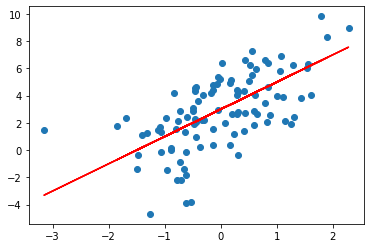

In [ ]:
m = 2.0
q = 3.0
N = 100
noise = 2.0

X = np.random.randn(N)
Y = m*X + q + noise * np.random.randn(N)

plt.scatter(X,Y)
plt.plot(X, m*X + q, color = 'red')

Using the previously implemented functions to compute the Moore-Penrose pseudo inverse, solve the least-squares problem
$$
\min_{m,q} \sum_{i=1}^N (\tilde{y}_i - (m x_i + q))^2
$$
and display the regression line superimposed to the noisy data and the exact model.

Repeat the excercise by solving the normal equations. Compare the results

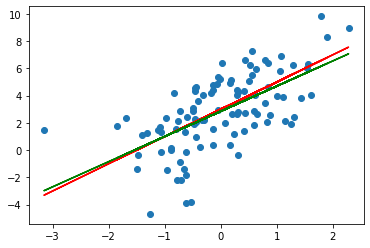

In [ ]:
Phi = np.block([X[:,None] , np.ones((N,1)) ]) #I put all the values in the firts column of a matrix, and ones in the second one
w_LS = my_pinv2(Phi) @ Y
m_LS = w_LS[0]
q_LS = w_LS[1]
m_LS, q_LS


plt.scatter(X,Y)
plt.plot(X, m*X + q, color = 'red')
plt.plot(X, m_LS*X + q_LS, color = 'green')

# Ridge regression and Kernel regression

Consider the function
$$
y = f(x) = \tanh(2x - 1).
$$

Generate $N = 100$ points $x_i$, sampling from a standard Gaussian distribution, and the associated $y_i$. Then, add a synthetic noise ($\epsilon_i$) by sampling from a Gaussian distribution with zero mean and standard deviation $\sigma = 0.1$. Plot the noisy data $(x_i, \tilde{y}_i)$, where $\tilde{y}_i = y_i + \epsilon_i$, in the $(x,y)$ plane.

Then, generate 1000 testing points, uniformly distributed in the interval $[-3,3]$, and display the function $y = f(x)$ in correspondence of the testing points.

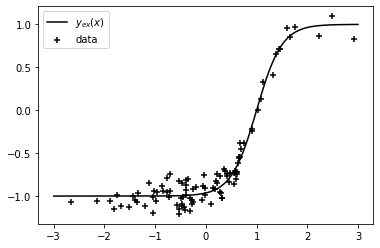

In [ ]:
N = 100
noise = 0.1
y_ex = lambda x: np.tanh(2*(x - 1))

X = np.random.randn(N)
Y = y_ex(X) + noise * np.random.randn(N)

N_test = 1000
X_test = np.linspace(-3,3,N_test)
Y_test_ex = y_ex(X_test)

plt.scatter(X,Y, marker = '+', color = 'black', label = 'data')
plt.plot(X_test, Y_test_ex, color = 'black', label = '$y_{ex}(x)$')
plt.legend()

Proceeding as in the previous exercise, compute the regression line resulting from the **least squares regression** of data $(x_i, \tilde{y}_i)$. Plot the resulting regression line.

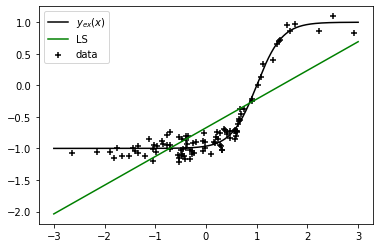

In [ ]:
Phi = np.block([X[:,None] , np.ones((N,1)) ]) #I put all the values in the firts column of a matrix, and ones in the second one
w_LS = my_pinv2(Phi) @ Y
m_LS = w_LS[0]
q_LS = w_LS[1]
m_LS, q_LS
Y_test_LS = m_LS*X_test + q_LS

plt.scatter(X,Y, marker = '+', color = 'black', label = 'data')
plt.plot(X_test, Y_test_ex, color = 'black', label = '$y_{ex}(x)$')
plt.plot(X_test, Y_test_LS, color = 'green',label = 'LS')
plt.legend()

As we can see LS does not suit with non linear model.. we have to use ridge regression to introduce some non linearity 


Let us now consider **ridge regression**, corresponding to a regularizaton parameter $\lambda = 1.0$. Compare the obtained regression line with the one obtained through least squares regression.

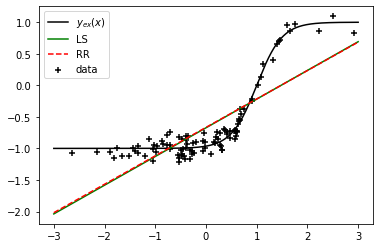

In [ ]:
lam = 1.0 
alpha = np.linalg.solve(Phi @ Phi.transpose() + lam * np.identity(N), Y)
w_RR = Phi.transpose() @ alpha
Phi_test = np.block([X_test[:,None] , np.ones((N_test,1)) ])
Y_test_RR = Phi_test @ w_RR

plt.scatter(X,Y, marker = '+', color = 'black', label = 'data')
plt.plot(X_test, Y_test_ex, color = 'black', label = '$y_{ex}(x)$')
plt.plot(X_test, Y_test_LS, color = 'green',label = 'LS')
plt.plot(X_test, Y_test_RR, color = 'red', linestyle = '--',label = 'RR')
plt.legend()

as we can see, w/ lambda=1 we are in the same case of LS... by increasing it i will penalize large values of w..



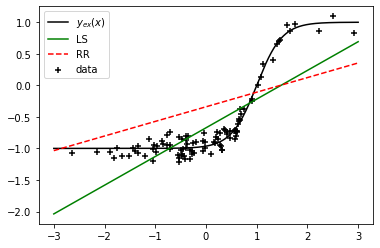

In [ ]:
lam = 100
alpha = np.linalg.solve(Phi @ Phi.transpose() + lam * np.identity(N), Y)
w_RR = Phi.transpose() @ alpha
Phi_test = np.block([X_test[:,None] , np.ones((N_test,1)) ])
Y_test_RR = Phi_test @ w_RR

plt.scatter(X,Y, marker = '+', color = 'black', label = 'data')
plt.plot(X_test, Y_test_ex, color = 'black', label = '$y_{ex}(x)$')
plt.plot(X_test, Y_test_LS, color = 'green',label = 'LS')
plt.plot(X_test, Y_test_RR, color = 'red', linestyle = '--',label = 'RR')
plt.legend()

Consider now **kernel regression**. 

1. Consider first the scalar product kernel 
$$K(x_i,x_j) = x_i x_j + 1.$$
Compute the regression function and compare the result with the ones obtained at the previous point. How do the results compare?

2. Consider then the higher-order scalar product kernel, for $q > 1$.
$$K(x_i,x_j) = (x_i x_j + 1)^q.$$

3. Consider finally a Gaussian kernel, for $\sigma > 0$.
$$K(x_i,x_j) = \exp\left(-\frac{(x_i - x_j)^2}{2 \sigma^2}\right).$$

In [ ]:
#First order kernel: we have a linear behaviour as for the previous ones LS and RR
def kernel(xi,xj):
  return xi*xj + 1


In [ ]:
def kernel(xi,xj):
  return (xi*xj + 1)**2 #second order kernel: non linear behaviour


As we increase the order, we can see that KR fit more the model

(-2.0, 2.0)

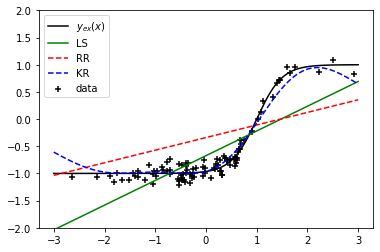

In [ ]:
sigma=1.0 #if we decrease it we have a randomic behaviour
lam=1.0 #if we increase=> smoother behaviour, if decrease suit more the model

def kernel(xi,xj):
  return np.exp(-(xi-xj)**2/(2*sigma**2)) #second order kernel: non linear behaviour

K = np.array([[kernel(X[i],X[j]) for j in range(N)] for i in range(N)])
alpha = np.linalg.solve( K + lam * np.identity(N), Y)


K_test = np.array([[kernel(X_test[i],X[j]) for j in range(N)] for i in range(N_test)])
Y_test_KR = K_test @ alpha
 

plt.scatter(X,Y, marker = '+', color = 'black', label = 'data')
plt.plot(X_test, Y_test_ex, color = 'black', label = '$y_{ex}(x)$')
plt.plot(X_test, Y_test_LS, color = 'green',label = 'LS')
plt.plot(X_test, Y_test_RR, color = 'red', linestyle = '--',label = 'RR')
plt.plot(X_test, Y_test_KR, color = 'blue', linestyle = '--',label = 'KR')
plt.legend()

plt.ylim([-2,2])